🚀 Modelo ML: Regresión Lineal para Importe 🚀
Error Absoluto Medio (MAE): $1191.23
Raíz del Error Cuadrático Medio (RMSE): $1643.93


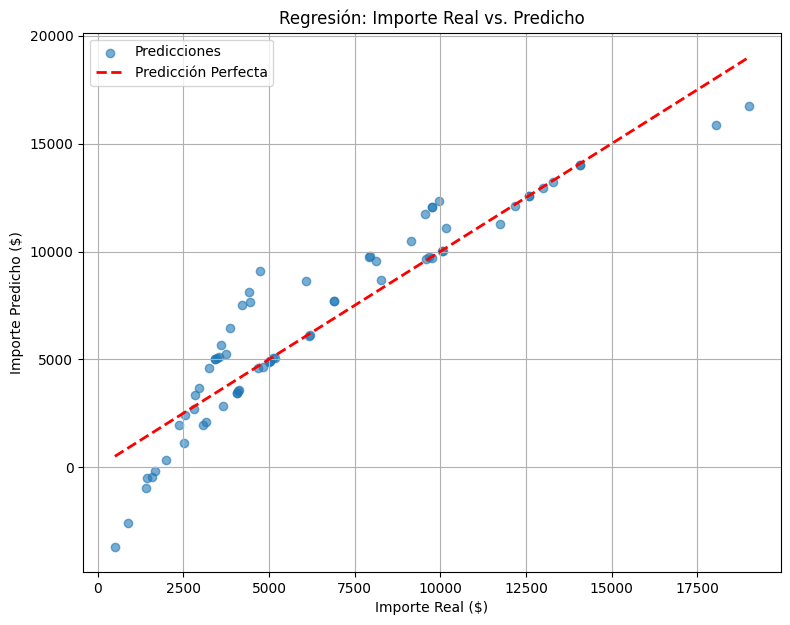

In [4]:
# Ejecución directa en una celda de Jupyter Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Inicio del análisis ---

try:
    df = pd.read_excel('Assets/detalle_ventas.xlsx') # ruta 
    
    # 1. Preparar los datos
    X = df[['cantidad', 'precio_unitario']].fillna(0) # Características
    y = df['importe'] # Etiqueta (variable a predecir)
    
    # 2. Dividir y entrenar el modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    modelo_regresion = LinearRegression()
    modelo_regresion.fit(X_train, y_train)
    
    # 3. Generar predicciones y calcular métricas
    y_pred = modelo_regresion.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("🚀 Modelo ML: Regresión Lineal para Importe 🚀")
    print("="*40)
    print(f"Error Absoluto Medio (MAE): ${mae:.2f}")
    print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse:.2f}")
    
    # 4. Representación Gráfica (Se muestra directamente en el output del Notebook)
    plt.figure(figsize=(9, 7))
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predicciones')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta') 
    plt.xlabel("Importe Real ($)")
    plt.ylabel("Importe Predicho ($)")
    plt.title("Regresión: Importe Real vs. Predicho")
    plt.legend()
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("⚠️ ERROR: No se encontró el archivo de datos. Revisa la ruta.")
except Exception as e:
    print(f"❌ ERROR al ejecutar el análisis: {e}")

MAE: 1191.2342485903762
RMSE: 1643.9336012983838
R2: 0.8431256274239469


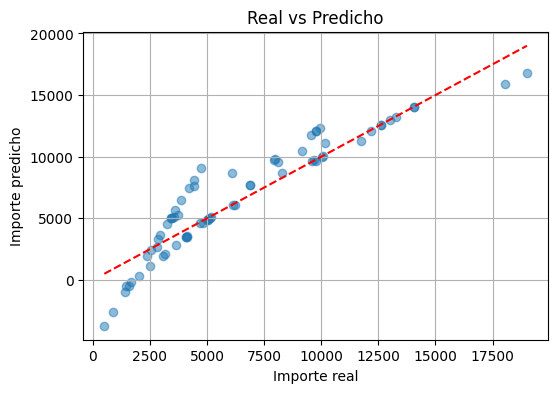

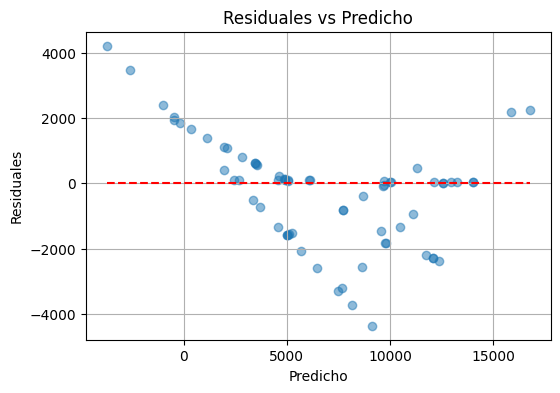

In [ ]:
from sklearn.metrics import r2_score

# ejecutar esta celda después de entrenar el modelo
# Asegurarse de que y_test e y_pred existan. Si no existen pero sí existe el modelo y los datos,
# reconstruimos la división y calculamos las predicciones. Si no, pedimos ejecutar la celda de entrenamiento.
if 'y_test' not in globals() or 'y_pred' not in globals():
	if all(v in globals() for v in ['modelo_regresion', 'X', 'y', 'train_test_split']):
		# Reconstruir la división usando los mismos parámetros que la celda original
		X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
		y_pred = modelo_regresion.predict(X_test)
	else:
		raise NameError(
			"y_test o y_pred no están definidos. Ejecuta primero la celda que carga los datos y entrena el modelo."
		)

# Cálculo de métricas y gráficas (se asumen imports realizados en la celda inicial del notebook)
res = y_test - y_pred

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Importe real")
plt.ylabel("Importe predicho")
plt.title("Real vs Predicho")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, res, alpha=0.5)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
plt.xlabel("Predicho")
plt.ylabel("Residuales")
plt.title("Residuales vs Predicho")
plt.grid(True)
plt.show()